# MNIST Digits Classifier

Welcome to the programming exercise portion of Topic 4! In this notebook, we are going to train a dense Neural Network used to **classify handwritten digits**. This classifier will then be loaded into the backend of a handwritten digits combination lock.

## Introduction

Over the years, the MNIST Digits dataset has become one of the world's most popular hand-written numbers datasets. First developed in 1998, MNIST Digits contains over 60,000 training and testing examples obtained from high school students who volunteered their time to write and label numbers. This dataset was used to test and research the cutting edge technology that are Neural Networks from the early 2000s.

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import torch

## Preprocessing the Dataset

In this section, we will prepare our Training, Testing, and Cross-validation datasets. Before moving on, it's always important to visualize our image data.

In [2]:
trainset = pd.read_csv("datasets/train.csv")
testset = pd.read_csv("datasets/test.csv")

trainset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Preparing the Training Examples

In [3]:
# gets all the rows, and all columns AFTER the first one
features = trainset.iloc[:, 1:].to_numpy()

print(f"features shape: {features.shape}")


features shape: (42000, 784)


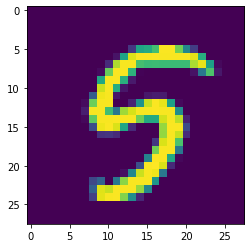

In [4]:
plt.imshow(features[8].reshape(28, 28))
plt.show()

### One-Hot Encoding the Labels

In [5]:
# creates one-hot encoding out of the label-encoded classes
labels_dummy = pd.get_dummies(trainset['label'])
labels_dummy

labels = labels_dummy.to_numpy()
print(f"labels shape: {labels.shape}")

labels shape: (42000, 10)


### Preparing the Test Set

In [6]:
testset

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


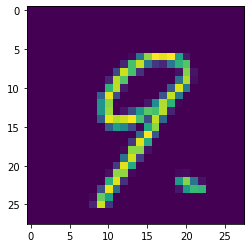

In [7]:
features_test = testset.to_numpy()
plt.imshow(features_test[2].reshape(28, 28))
plt.show()

### Checking for Imbalanced Classes

In [8]:
# count the number of items in each class
print(np.sum(labels, axis=0))

[4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]


### Train-CV Split

In [9]:
from sklearn.model_selection import train_test_split

# Train/CV split using the training data.
# The testing data contains no labels, thus we cannot create CV set from it
X_train, X_cv, Y_train, Y_cv = train_test_split(features, labels, test_size=0.1)

# convert to pytorch tensors on GPU
X_train_t = torch.from_numpy(X_train).float().cuda()
Y_train_t = torch.from_numpy(Y_train).float().cuda()
X_cv_t = torch.from_numpy(X_cv).float().cuda()
Y_cv_t = torch.from_numpy(Y_cv).float().cuda()

X_test_t = torch.from_numpy(features_test).float().cuda()

## Neural Network

This Neural Network will use a **3-layer** design with **900, 900,** and **10** nodes in each layer. Since the input data are images, we need to flatten the **28 x 28** images into a vector of size **784**.

### Defining Our Model

In [10]:
import torch
from torch.nn import Module, Linear, Softmax,  ReLU, BatchNorm1d, CrossEntropyLoss, Dropout
from torch.optim import SGD
from torchmetrics import Accuracy

class NN(Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.bn = BatchNorm1d(input_dim)
        self.z1 = Linear(input_dim, 900)
        self.a1 = ReLU()
        
        self.z2 = Linear(900, 900)
        self.a2 = ReLU()
        
        self.z3 = Linear(900, output_dim)   
        self.sm = Softmax(dim=1)
        
        # holds a collection of hidden layer activations 
        self.layer_out = []

    def forward(self, x):
        # clears layer_out before each forward pass
        self.layer_out = []
        
        # hidden layer 1
        x = self.bn(x)
        x = self.z1(x)
        x = self.a1(x)
        
        # Collects the output of hidden layers if not in training mode
        if not self.training:
            self.layer_out.append(x.cpu())
        
        # hidden layer 2
        x = self.z2(x)
        x = self.a2(x)
        
        
        # Collects the output of hidden layers if not in training mode
        if not self.training:
            self.layer_out.append(x.cpu())
        
        # output layer
        x = self.z3(x)
        x = self.sm(x)
        
        return x
    
    def fit(self, X_train, Y_train, loss_fn, opt, X_cv=None, Y_cv=None, epochs=1):
        for i in range(epochs):
            opt.zero_grad()
            self.train()
            Y_pred = self(X_train)
            
            cost = loss_fn(Y_pred, Y_train)
            
            # training accuracy
            acc = Accuracy().cuda()
            msg = f"Iter: {i+1}, loss: {cost.item(): .4f}, accuracy: {acc(torch.argmax(Y_pred, dim=1).int(), torch.argmax(Y_train, dim=1).int()): .4f}"
            
            # if X_cv and Y_cv were given, print validation accuracy and loss
            if torch.is_tensor(X_cv) and torch.is_tensor(Y_cv):
                # must put model in eval mode
                self.eval()
                Y_pred_cv = self(X_cv)
                val_cost = loss_fn(Y_pred_cv, Y_cv)
                msg += f",  val_loss: {val_cost.item(): .4f}, val_accuracy: {acc(torch.argmax(Y_pred_cv, dim=1).int(), torch.argmax(Y_cv, dim=1).int()): .4f}"
                self.train()
                
                
            cost.backward()
            print(msg)
            opt.step()
            

def CCE(Y_pred, Y_true):
    """ Calculates CCE loss
    Args:
        Y_pred, Y_true: torch.tensors that represents the predicted output 
                        and ground truth. Must have shape (num_examples, num_classes)
    Returns:
        set_sum: a torch.tensor that contains the calculated cost
    """
    
    Y_pred = 0.9999 * Y_pred + (1-0.9999)/2
    
    ylogy = -Y_true * torch.log(Y_pred)
    class_sum = torch.sum(ylogy, axis=1)
    set_sum = torch.sum(class_sum)/Y_pred.shape[0]
    return set_sum
    

### Training

In [11]:
input_dim, output_dim = (X_train.shape[1], 10)

LEARNING_RATE = 0.1
EPOCHS = 1000
L2 = 2e-3

model = NN(input_dim, output_dim).cuda()
criterion = CCE
optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=L2, momentum=0.9)


model.fit(X_train_t, Y_train_t, criterion, optimizer, X_cv_t, Y_cv_t, EPOCHS)

Iter: 1, loss:  2.3027, accuracy:  0.1210,  val_loss:  2.3143, val_accuracy:  0.1186
Iter: 2, loss:  2.2658, accuracy:  0.2096,  val_loss:  2.2244, val_accuracy:  0.2060
Iter: 3, loss:  2.1990, accuracy:  0.4240,  val_loss:  2.1174, val_accuracy:  0.3440
Iter: 4, loss:  2.1083, accuracy:  0.5475,  val_loss:  1.9985, val_accuracy:  0.4795
Iter: 5, loss:  1.9954, accuracy:  0.5600,  val_loss:  1.8674, val_accuracy:  0.5438
Iter: 6, loss:  1.8566, accuracy:  0.5715,  val_loss:  1.7190, val_accuracy:  0.5762
Iter: 7, loss:  1.6866, accuracy:  0.5983,  val_loss:  1.5486, val_accuracy:  0.6124
Iter: 8, loss:  1.4864, accuracy:  0.6396,  val_loss:  1.3569, val_accuracy:  0.6621
Iter: 9, loss:  1.2691, accuracy:  0.6871,  val_loss:  1.1513, val_accuracy:  0.7110
Iter: 10, loss:  1.0601, accuracy:  0.7279,  val_loss:  0.9524, val_accuracy:  0.7569
Iter: 11, loss:  0.8826, accuracy:  0.7639,  val_loss:  0.7882, val_accuracy:  0.7919
Iter: 12, loss:  0.7426, accuracy:  0.7953,  val_loss:  0.6706,

Iter: 97, loss:  0.0968, accuracy:  0.9748,  val_loss:  0.1583, val_accuracy:  0.9543
Iter: 98, loss:  0.0960, accuracy:  0.9749,  val_loss:  0.1577, val_accuracy:  0.9545
Iter: 99, loss:  0.0953, accuracy:  0.9752,  val_loss:  0.1572, val_accuracy:  0.9545
Iter: 100, loss:  0.0945, accuracy:  0.9754,  val_loss:  0.1566, val_accuracy:  0.9552
Iter: 101, loss:  0.0937, accuracy:  0.9757,  val_loss:  0.1561, val_accuracy:  0.9552
Iter: 102, loss:  0.0930, accuracy:  0.9758,  val_loss:  0.1556, val_accuracy:  0.9555
Iter: 103, loss:  0.0923, accuracy:  0.9760,  val_loss:  0.1551, val_accuracy:  0.9555
Iter: 104, loss:  0.0916, accuracy:  0.9762,  val_loss:  0.1546, val_accuracy:  0.9560
Iter: 105, loss:  0.0909, accuracy:  0.9764,  val_loss:  0.1540, val_accuracy:  0.9562
Iter: 106, loss:  0.0903, accuracy:  0.9766,  val_loss:  0.1535, val_accuracy:  0.9562
Iter: 107, loss:  0.0896, accuracy:  0.9769,  val_loss:  0.1530, val_accuracy:  0.9560
Iter: 108, loss:  0.0889, accuracy:  0.9770,  

Iter: 193, loss:  0.0591, accuracy:  0.9874,  val_loss:  0.1292, val_accuracy:  0.9619
Iter: 194, loss:  0.0589, accuracy:  0.9875,  val_loss:  0.1290, val_accuracy:  0.9624
Iter: 195, loss:  0.0588, accuracy:  0.9875,  val_loss:  0.1289, val_accuracy:  0.9624
Iter: 196, loss:  0.0586, accuracy:  0.9876,  val_loss:  0.1287, val_accuracy:  0.9626
Iter: 197, loss:  0.0584, accuracy:  0.9878,  val_loss:  0.1285, val_accuracy:  0.9626
Iter: 198, loss:  0.0582, accuracy:  0.9878,  val_loss:  0.1284, val_accuracy:  0.9626
Iter: 199, loss:  0.0581, accuracy:  0.9879,  val_loss:  0.1283, val_accuracy:  0.9626
Iter: 200, loss:  0.0579, accuracy:  0.9880,  val_loss:  0.1281, val_accuracy:  0.9626
Iter: 201, loss:  0.0577, accuracy:  0.9880,  val_loss:  0.1280, val_accuracy:  0.9626
Iter: 202, loss:  0.0576, accuracy:  0.9881,  val_loss:  0.1278, val_accuracy:  0.9626
Iter: 203, loss:  0.0574, accuracy:  0.9881,  val_loss:  0.1277, val_accuracy:  0.9626
Iter: 204, loss:  0.0572, accuracy:  0.9881

Iter: 289, loss:  0.0488, accuracy:  0.9912,  val_loss:  0.1193, val_accuracy:  0.9669
Iter: 290, loss:  0.0487, accuracy:  0.9913,  val_loss:  0.1192, val_accuracy:  0.9669
Iter: 291, loss:  0.0487, accuracy:  0.9913,  val_loss:  0.1191, val_accuracy:  0.9669
Iter: 292, loss:  0.0486, accuracy:  0.9913,  val_loss:  0.1191, val_accuracy:  0.9669
Iter: 293, loss:  0.0486, accuracy:  0.9913,  val_loss:  0.1190, val_accuracy:  0.9669
Iter: 294, loss:  0.0485, accuracy:  0.9914,  val_loss:  0.1189, val_accuracy:  0.9669
Iter: 295, loss:  0.0485, accuracy:  0.9914,  val_loss:  0.1189, val_accuracy:  0.9669
Iter: 296, loss:  0.0484, accuracy:  0.9914,  val_loss:  0.1188, val_accuracy:  0.9671
Iter: 297, loss:  0.0484, accuracy:  0.9914,  val_loss:  0.1188, val_accuracy:  0.9671
Iter: 298, loss:  0.0483, accuracy:  0.9914,  val_loss:  0.1187, val_accuracy:  0.9671
Iter: 299, loss:  0.0483, accuracy:  0.9915,  val_loss:  0.1186, val_accuracy:  0.9671
Iter: 300, loss:  0.0482, accuracy:  0.9915

Iter: 385, loss:  0.0458, accuracy:  0.9925,  val_loss:  0.1148, val_accuracy:  0.9707
Iter: 386, loss:  0.0457, accuracy:  0.9925,  val_loss:  0.1148, val_accuracy:  0.9710
Iter: 387, loss:  0.0457, accuracy:  0.9926,  val_loss:  0.1147, val_accuracy:  0.9710
Iter: 388, loss:  0.0457, accuracy:  0.9926,  val_loss:  0.1147, val_accuracy:  0.9710
Iter: 389, loss:  0.0457, accuracy:  0.9926,  val_loss:  0.1147, val_accuracy:  0.9710
Iter: 390, loss:  0.0457, accuracy:  0.9926,  val_loss:  0.1146, val_accuracy:  0.9710
Iter: 391, loss:  0.0457, accuracy:  0.9926,  val_loss:  0.1146, val_accuracy:  0.9710
Iter: 392, loss:  0.0457, accuracy:  0.9926,  val_loss:  0.1146, val_accuracy:  0.9707
Iter: 393, loss:  0.0456, accuracy:  0.9926,  val_loss:  0.1145, val_accuracy:  0.9707
Iter: 394, loss:  0.0456, accuracy:  0.9926,  val_loss:  0.1145, val_accuracy:  0.9705
Iter: 395, loss:  0.0456, accuracy:  0.9926,  val_loss:  0.1145, val_accuracy:  0.9702
Iter: 396, loss:  0.0456, accuracy:  0.9926

Iter: 481, loss:  0.0451, accuracy:  0.9930,  val_loss:  0.1124, val_accuracy:  0.9712
Iter: 482, loss:  0.0451, accuracy:  0.9930,  val_loss:  0.1123, val_accuracy:  0.9712
Iter: 483, loss:  0.0451, accuracy:  0.9930,  val_loss:  0.1123, val_accuracy:  0.9712
Iter: 484, loss:  0.0451, accuracy:  0.9930,  val_loss:  0.1123, val_accuracy:  0.9712
Iter: 485, loss:  0.0451, accuracy:  0.9930,  val_loss:  0.1123, val_accuracy:  0.9712
Iter: 486, loss:  0.0451, accuracy:  0.9930,  val_loss:  0.1123, val_accuracy:  0.9712
Iter: 487, loss:  0.0451, accuracy:  0.9931,  val_loss:  0.1122, val_accuracy:  0.9712
Iter: 488, loss:  0.0451, accuracy:  0.9931,  val_loss:  0.1122, val_accuracy:  0.9712
Iter: 489, loss:  0.0451, accuracy:  0.9931,  val_loss:  0.1122, val_accuracy:  0.9712
Iter: 490, loss:  0.0451, accuracy:  0.9931,  val_loss:  0.1122, val_accuracy:  0.9712
Iter: 491, loss:  0.0451, accuracy:  0.9931,  val_loss:  0.1122, val_accuracy:  0.9712
Iter: 492, loss:  0.0451, accuracy:  0.9931

Iter: 577, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1109, val_accuracy:  0.9714
Iter: 578, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1109, val_accuracy:  0.9714
Iter: 579, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1109, val_accuracy:  0.9714
Iter: 580, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1109, val_accuracy:  0.9714
Iter: 581, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1108, val_accuracy:  0.9714
Iter: 582, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1108, val_accuracy:  0.9714
Iter: 583, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1108, val_accuracy:  0.9714
Iter: 584, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1108, val_accuracy:  0.9714
Iter: 585, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1108, val_accuracy:  0.9714
Iter: 586, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1108, val_accuracy:  0.9717
Iter: 587, loss:  0.0452, accuracy:  0.9933,  val_loss:  0.1107, val_accuracy:  0.9717
Iter: 588, loss:  0.0452, accuracy:  0.9933

Iter: 673, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1092, val_accuracy:  0.9719
Iter: 674, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1092, val_accuracy:  0.9719
Iter: 675, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1092, val_accuracy:  0.9719
Iter: 676, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1092, val_accuracy:  0.9719
Iter: 677, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1092, val_accuracy:  0.9719
Iter: 678, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1091, val_accuracy:  0.9719
Iter: 679, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1091, val_accuracy:  0.9719
Iter: 680, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1091, val_accuracy:  0.9719
Iter: 681, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1091, val_accuracy:  0.9721
Iter: 682, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1091, val_accuracy:  0.9721
Iter: 683, loss:  0.0454, accuracy:  0.9933,  val_loss:  0.1090, val_accuracy:  0.9721
Iter: 684, loss:  0.0454, accuracy:  0.9933

Iter: 769, loss:  0.0456, accuracy:  0.9933,  val_loss:  0.1075, val_accuracy:  0.9726
Iter: 770, loss:  0.0456, accuracy:  0.9933,  val_loss:  0.1075, val_accuracy:  0.9726
Iter: 771, loss:  0.0456, accuracy:  0.9933,  val_loss:  0.1075, val_accuracy:  0.9726
Iter: 772, loss:  0.0456, accuracy:  0.9933,  val_loss:  0.1075, val_accuracy:  0.9726
Iter: 773, loss:  0.0456, accuracy:  0.9933,  val_loss:  0.1074, val_accuracy:  0.9726
Iter: 774, loss:  0.0456, accuracy:  0.9933,  val_loss:  0.1074, val_accuracy:  0.9726
Iter: 775, loss:  0.0456, accuracy:  0.9933,  val_loss:  0.1074, val_accuracy:  0.9726
Iter: 776, loss:  0.0456, accuracy:  0.9933,  val_loss:  0.1074, val_accuracy:  0.9726
Iter: 777, loss:  0.0457, accuracy:  0.9933,  val_loss:  0.1074, val_accuracy:  0.9726
Iter: 778, loss:  0.0457, accuracy:  0.9933,  val_loss:  0.1074, val_accuracy:  0.9726
Iter: 779, loss:  0.0457, accuracy:  0.9933,  val_loss:  0.1073, val_accuracy:  0.9726
Iter: 780, loss:  0.0457, accuracy:  0.9933

Iter: 865, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1060, val_accuracy:  0.9726
Iter: 866, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1060, val_accuracy:  0.9726
Iter: 867, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1060, val_accuracy:  0.9726
Iter: 868, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1060, val_accuracy:  0.9726
Iter: 869, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1059, val_accuracy:  0.9726
Iter: 870, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1059, val_accuracy:  0.9726
Iter: 871, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1059, val_accuracy:  0.9726
Iter: 872, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1059, val_accuracy:  0.9726
Iter: 873, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1059, val_accuracy:  0.9726
Iter: 874, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1059, val_accuracy:  0.9726
Iter: 875, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1059, val_accuracy:  0.9726
Iter: 876, loss:  0.0457, accuracy:  0.9932

Iter: 961, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1047, val_accuracy:  0.9733
Iter: 962, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1047, val_accuracy:  0.9733
Iter: 963, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1047, val_accuracy:  0.9733
Iter: 964, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1047, val_accuracy:  0.9733
Iter: 965, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1047, val_accuracy:  0.9733
Iter: 966, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1047, val_accuracy:  0.9733
Iter: 967, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1047, val_accuracy:  0.9733
Iter: 968, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1047, val_accuracy:  0.9733
Iter: 969, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1046, val_accuracy:  0.9733
Iter: 970, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1046, val_accuracy:  0.9733
Iter: 971, loss:  0.0457, accuracy:  0.9932,  val_loss:  0.1046, val_accuracy:  0.9733
Iter: 972, loss:  0.0457, accuracy:  0.9932

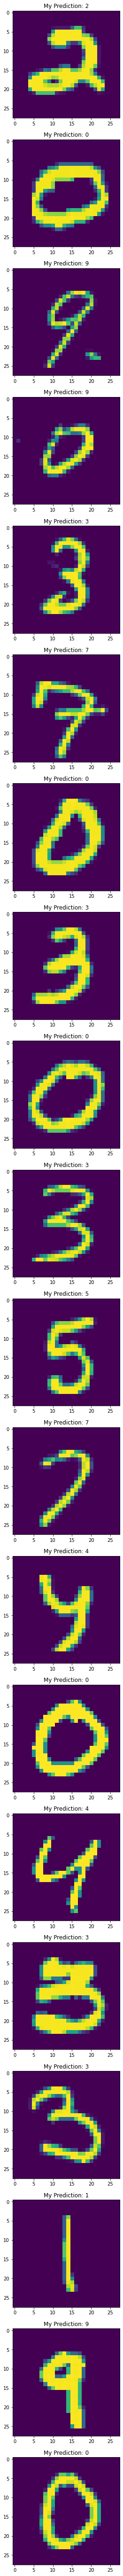

In [12]:
model.eval()

# make predictions on the first 20 examples of X_test_t
Y_test_t = model(X_test_t[:20, :])

# Convert the first 20 examples from torch.tensor
# to np.ndarray so we can plot it
X_test = X_test_t[:20, :].cpu().detach().numpy()
Y_test = Y_test_t.cpu().detach().numpy()

# Create subplots with 20 subplots
fig, axes = plt.subplots(X_test.shape[0], 1, figsize=(100, 100))

# each element in axes will contain an image plot
for i in range(X_test.shape[0]):
    axes[i].imshow(X_test[i].reshape((28, 28)))
    axes[i].title.set_text(f'My Prediction: {np.argmax(Y_test, axis=1)[i]}')
    
plt.show()
    

In [16]:
# Convert to ScriptModule
scrpt = torch.jit.script(model.cpu())
scrpt.save("mnist_predictor.pt")

## What's Going On in the Hidden Layers?

Previously in the course, we promised that we are going to look into the hidden layers to see what's going on.

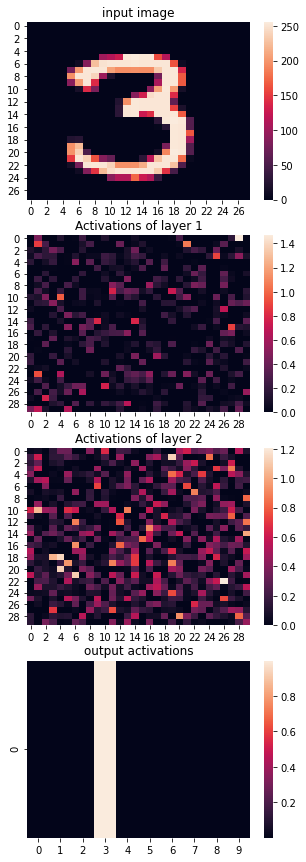

In [14]:
from torch.nn import Parameter

# test_ex = test example
def show_hidden(model, test_ex):
    """ Visualizes the activations in the hidden layers
    Args:
        model: your trained pytorch model
        test_ex: A torch.tensor containing a single example
    """
    # set to eval mode
    model.eval()
    
    # unsqueeze adds an extra dimension to your tensor
    test_ex = test_ex.unsqueeze(dim=0).cpu()
    y_pred = model(test_ex)
    
    # creates 4 subplots
    fig, axes = plt.subplots(2 + len(model.layer_out), 1, figsize=(5, 15))
    
    # first subplot will be of the input image
    sn.heatmap(test_ex.cpu().detach().numpy().reshape(28, 28), ax=axes[0])
    axes[0].set_title("input image")
    
    # second and third subplots are the hidden layers
    for i in range(len(model.layer_out)):
        sn.heatmap(model.layer_out[i].cpu().detach().numpy().reshape(30, 30), ax=axes[i+1])
        axes[i+1].set_title(f"Activations of layer {i + 1}")

    # last subplot is the output layer
    sn.heatmap(y_pred.cpu().detach().numpy().reshape(1, 10), ax=axes[len(model.layer_out)+1])
    axes[3].set_title("output activations")
    
        
    plt.show()
    
    
        
        
        
show_hidden(model, X_test_t[120, :])